In [2]:
%load_ext autoreload
%autoreload 2

import os
import sys
base_path = os.path.abspath(os.path.join(os.getcwd(), '../../MERI'))
sys.path.append(base_path)
print(base_path)
import deepdoctection as dd
from meri.layout.pipeline_components import (AddPDFInfoComponent, 
                        DummyDetectorComponent, 
                        LayoutDetectorComponent,
                        OCRComponent,
                        DrawingsDetectorComponent,
                        ImageDetectorComponent,
                        TableDetectorComponent,
                        WordUnionComponent,
                        NMSComponent,
                        TextDetectorComponent,
                        TablePlumberComponent)
from meri.layout.pipeline import Pipeline
from meri.layout.pipeline_components.utils import ProcessingService, CONFIGS_PATH

from matplotlib import pyplot as plt
from PIL import Image, ImageDraw

/workspaces/MERI


/root/miniconda3/envs/layout_analysis/lib/python3.12/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[0703 08:43.45 @file_utils.py:36]  INF  PyTorch version 2.3.0 available.


In [3]:
from evaluation.layout_evaluations import LayoutEvaluator 
from utils import *
import json
import os
import sys

base_path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(base_path)

In [4]:
pdf_path = f'{base_path}/demo/data/Alfa Laval LKH.pdf'
# pdf_path = f'{base_path}/demo/data/64710_022  WHRGLYCOL HEAT EXCHANGER 2.pdf'

In [21]:
pipeline_config_path = os.path.abspath(os.path.join(CONFIGS_PATH, 'good_pipeline.yaml'))
print(pipeline_config_path)
pipeline = Pipeline.from_config(cfg_path=pipeline_config_path)
pipeline.build()

dps, page_dicts = pipeline.run(pdf_path)

[0703 08:51.31 @config.py:66]  WRN  Loading config /root/.cache/deepdoctection/configs/dd/d2/layout/CASCADE_RCNN_R_50_FPN_GN.yaml with yaml.unsafe_load. Your machine may be at risk if the file contains malicious content.


/workspaces/MERI/meri/layout/config/good_pipeline.yaml
Running configuration:  <bound method AttrDict.to_dict of {'DEVICE': 'cuda',
 'LIB': 'PT',
 'PT': {'LAYOUT': {'FILTER': ['table', 'figure'],
                   'WEIGHTS': 'layout/d2_model_0829999_layout_inf_only.pt'}}}>


[0703 08:51.32 @detection_checkpoint.py:38]  INF  [DetectionCheckpointer] Loading from /root/.cache/deepdoctection/weights/layout/d2_model_0829999_layout_inf_only.pt ...
[0703 08:51.32 @checkpoint.py:150]  INF  [Checkpointer] Loading from /root/.cache/deepdoctection/weights/layout/d2_model_0829999_layout_inf_only.pt ...
You are using a model of type table-transformer to instantiate a model of type . This is not supported for all configurations of models and can yield errors.
[0703 08:51.32 @_builder.py:187]  INF  Loading pretrained weights from Hugging Face hub (timm/resnet18.a1_in1k)
[0703 08:51.32 @_hub.py:180]  INF  [timm/resnet18.a1_in1k] Safe alternative available for 'pytorch_model.bin' (as 'model.safetensors'). Loading weights using safetensors.
[0703 08:51.32 @_builder.py:245]  INF  Missing keys (fc.weight, fc.bias) discovered while loading pretrained weights. This is expected if model is being adapted.


Running configuration:  <bound method AttrDict.to_dict of {'DEVICE': 'cuda',
 'LIB': 'PT',
 'PT': {'LAYOUT': {'FILTER': None,
                   'WEIGHTS': 'microsoft/table-transformer-detection/pytorch_model.bin'}}}>


Some weights of the model checkpoint at /root/.cache/deepdoctection/weights/microsoft/table-transformer-detection/pytorch_model.bin were not used when initializing TableTransformerForObjectDetection: ['model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/root/miniconda3/envs/layout_analysis/lib/python3.12/site-p

Running configuration:  <bound method AttrDict.to_dict of {'DEVICE': 'cuda',
 'LIB': 'PT',
 'PT': {'LAYOUT': {'FILTER': ['text', 'title', 'list', 'table'],
                   'WEIGHTS': 'layout/d2_model_0829999_layout_inf_only.pt'}}}>


[0703 08:51.33 @detection_checkpoint.py:38]  INF  [DetectionCheckpointer] Loading from /root/.cache/deepdoctection/weights/layout/d2_model_0829999_layout_inf_only.pt ...
[0703 08:51.33 @checkpoint.py:150]  INF  [Checkpointer] Loading from /root/.cache/deepdoctection/weights/layout/d2_model_0829999_layout_inf_only.pt ...
[0703 08:51.33 @doctectionpipe.py:84]  INF  Processing Alfa Laval LKH_0.pdf


Building pipeline from components:  [<meri.layout.pipeline_components.add_pdf_info_component.AddPDFInfoComponent object at 0x7fb80c16be60>, <meri.layout.pipeline_components.image_detector_component.ImageDetectorComponent object at 0x7fb798574b00>, <meri.layout.pipeline_components.layout_detection_component.LayoutDetectorComponent object at 0x7fb798a62180>, <meri.layout.pipeline_components.layout_detection_component.LayoutDetectorComponent object at 0x7fb80c5402f0>, <meri.layout.pipeline_components.layout_detection_component.LayoutDetectorComponent object at 0x7fb80fc6d5b0>, <meri.layout.pipeline_components.table_plumber_detector_component.TablePlumberComponent object at 0x7fb793f64920>, <meri.layout.pipeline_components.nms_component.NMSComponent object at 0x7fb798ef7b60>, <meri.layout.pipeline_components.ocr_component.OCRComponent object at 0x7fb793d582c0>, <meri.layout.pipeline_components.word_union_component.WordUnionComponent object at 0x7fb84a0b6510>]


[0703 08:51.34 @context.py:126]  INF  AddPDFInfoComponent total: 0.0887 sec.
[0703 08:51.34 @context.py:126]  INF  ImageDetectorComponent total: 0.0324 sec.
[0703 08:51.35 @context.py:126]  INF  LayoutDetectorComponent total: 0.4564 sec.
[0703 08:51.35 @context.py:126]  INF  LayoutDetectorComponent total: 0.0827 sec.
[0703 08:51.35 @context.py:126]  INF  LayoutDetectorComponent total: 0.1107 sec.
[0703 08:51.35 @context.py:126]  INF  TablePlumberComponent total: 0.1256 sec.
[0703 08:51.35 @context.py:126]  INF  NMSComponent total: 0.0013 sec.


Potential Tables Found: 0


[0703 08:51.36 @context.py:126]  INF  OCRComponent total: 1.4355 sec.
[0703 08:51.36 @context.py:126]  INF  WordUnionComponent total: 0.0002 sec.
[0703 08:51.37 @doctectionpipe.py:84]  INF  Processing Alfa Laval LKH_1.pdf
[0703 08:51.37 @context.py:126]  INF  AddPDFInfoComponent total: 0.0731 sec.
[0703 08:51.37 @context.py:126]  INF  ImageDetectorComponent total: 0.0019 sec.
[0703 08:51.37 @context.py:126]  INF  LayoutDetectorComponent total: 0.236 sec.
[0703 08:51.38 @context.py:126]  INF  LayoutDetectorComponent total: 0.0991 sec.
[0703 08:51.38 @context.py:126]  INF  LayoutDetectorComponent total: 0.1669 sec.
[0703 08:51.38 @context.py:126]  INF  TablePlumberComponent total: 0.1061 sec.
[0703 08:51.38 @context.py:126]  INF  NMSComponent total: 0.0008 sec.


Potential Tables Found: 8


[0703 08:51.39 @context.py:126]  INF  OCRComponent total: 1.1825 sec.
[0703 08:51.39 @context.py:126]  INF  WordUnionComponent total: 0.0514 sec.
[0703 08:51.39 @doctectionpipe.py:84]  INF  Processing Alfa Laval LKH_2.pdf
[0703 08:51.40 @context.py:126]  INF  AddPDFInfoComponent total: 0.081 sec.
[0703 08:51.40 @context.py:126]  INF  ImageDetectorComponent total: 0.0076 sec.
[0703 08:51.41 @context.py:126]  INF  LayoutDetectorComponent total: 0.407 sec.
[0703 08:51.41 @context.py:126]  INF  LayoutDetectorComponent total: 0.2524 sec.
[0703 08:51.41 @context.py:126]  INF  LayoutDetectorComponent total: 0.1189 sec.
[0703 08:51.41 @context.py:126]  INF  TablePlumberComponent total: 0.2544 sec.
[0703 08:51.41 @context.py:126]  INF  NMSComponent total: 0.001 sec.


Potential Tables Found: 5
Skipped overlapping table: [232, 492, 1181, 758]


[0703 08:51.43 @context.py:126]  INF  OCRComponent total: 2.1097 sec.
[0703 08:51.43 @context.py:126]  INF  WordUnionComponent total: 0.0521 sec.
[0703 08:51.44 @doctectionpipe.py:84]  INF  Processing Alfa Laval LKH_3.pdf
[0703 08:51.44 @context.py:126]  INF  AddPDFInfoComponent total: 0.0905 sec.
[0703 08:51.44 @context.py:126]  INF  ImageDetectorComponent total: 0.0071 sec.
[0703 08:51.45 @context.py:126]  INF  LayoutDetectorComponent total: 0.4131 sec.
[0703 08:51.45 @context.py:126]  INF  LayoutDetectorComponent total: 0.0987 sec.
[0703 08:51.45 @context.py:126]  INF  LayoutDetectorComponent total: 0.1139 sec.
[0703 08:51.45 @context.py:126]  INF  TablePlumberComponent total: 0.1109 sec.
[0703 08:51.45 @context.py:126]  INF  NMSComponent total: 0.0008 sec.


Potential Tables Found: 1
Skipped overlapping table: [236, 250, 1385, 2426]


[0703 08:51.47 @context.py:126]  INF  OCRComponent total: 1.4906 sec.
[0703 08:51.47 @context.py:126]  INF  WordUnionComponent total: 0.0067 sec.


In [22]:
from meri.transformation.transformer import DocumentTransformer, Format
doc_transformer = DocumentTransformer(pdf_path, table_extraction_method='pdfplumber') # or 'llm'
doc_transformer.merge_with_annotations(dps, [dd.LayoutType.figure, dd.LayoutType.table])
doc_transformer.docorate_unmatched_textblocks()

100%|██████████| 4/4 [00:00<00:00, 91.57it/s]


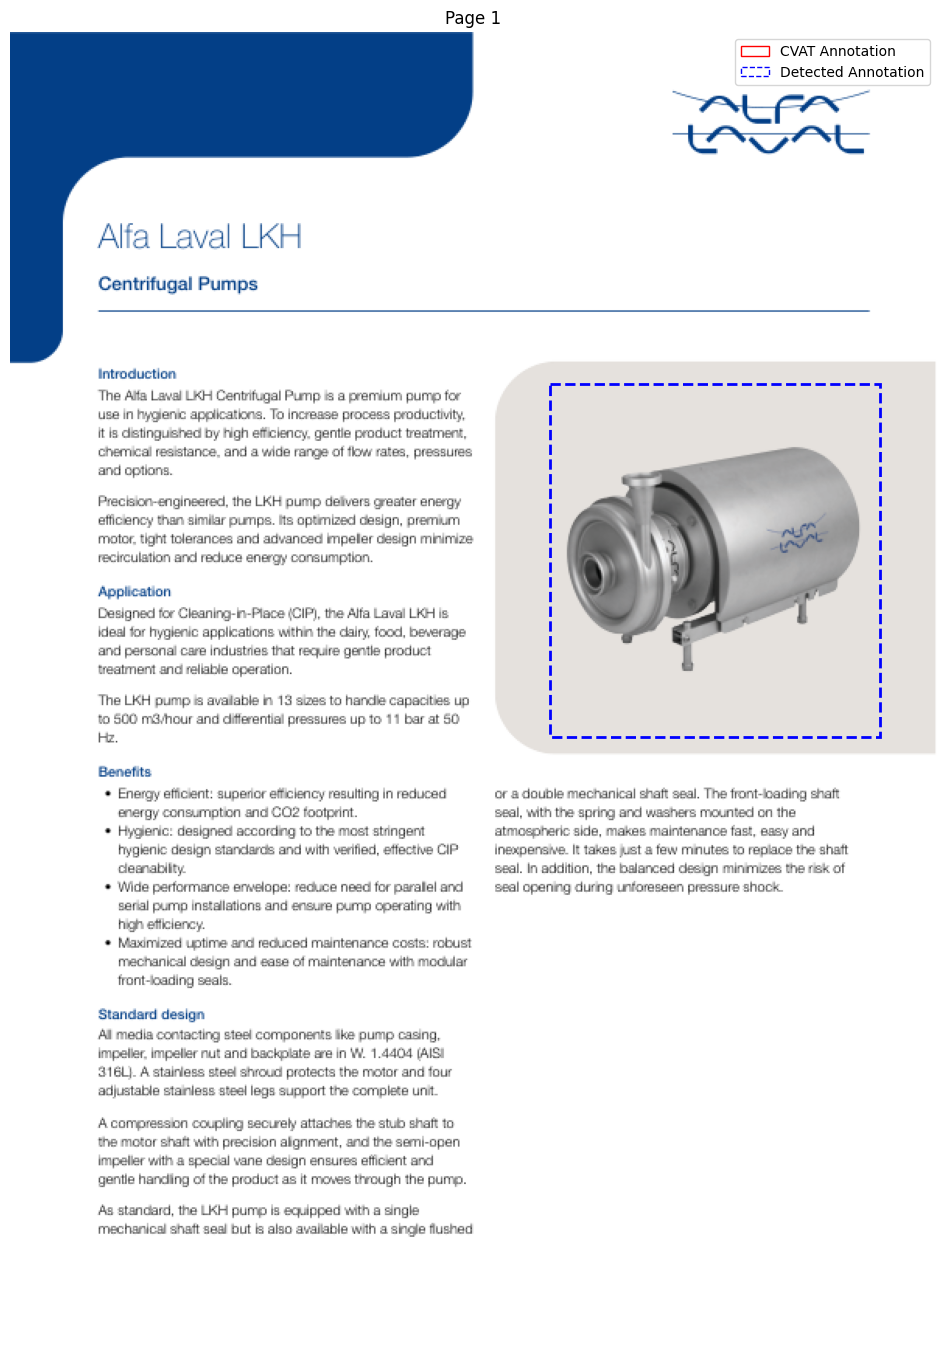

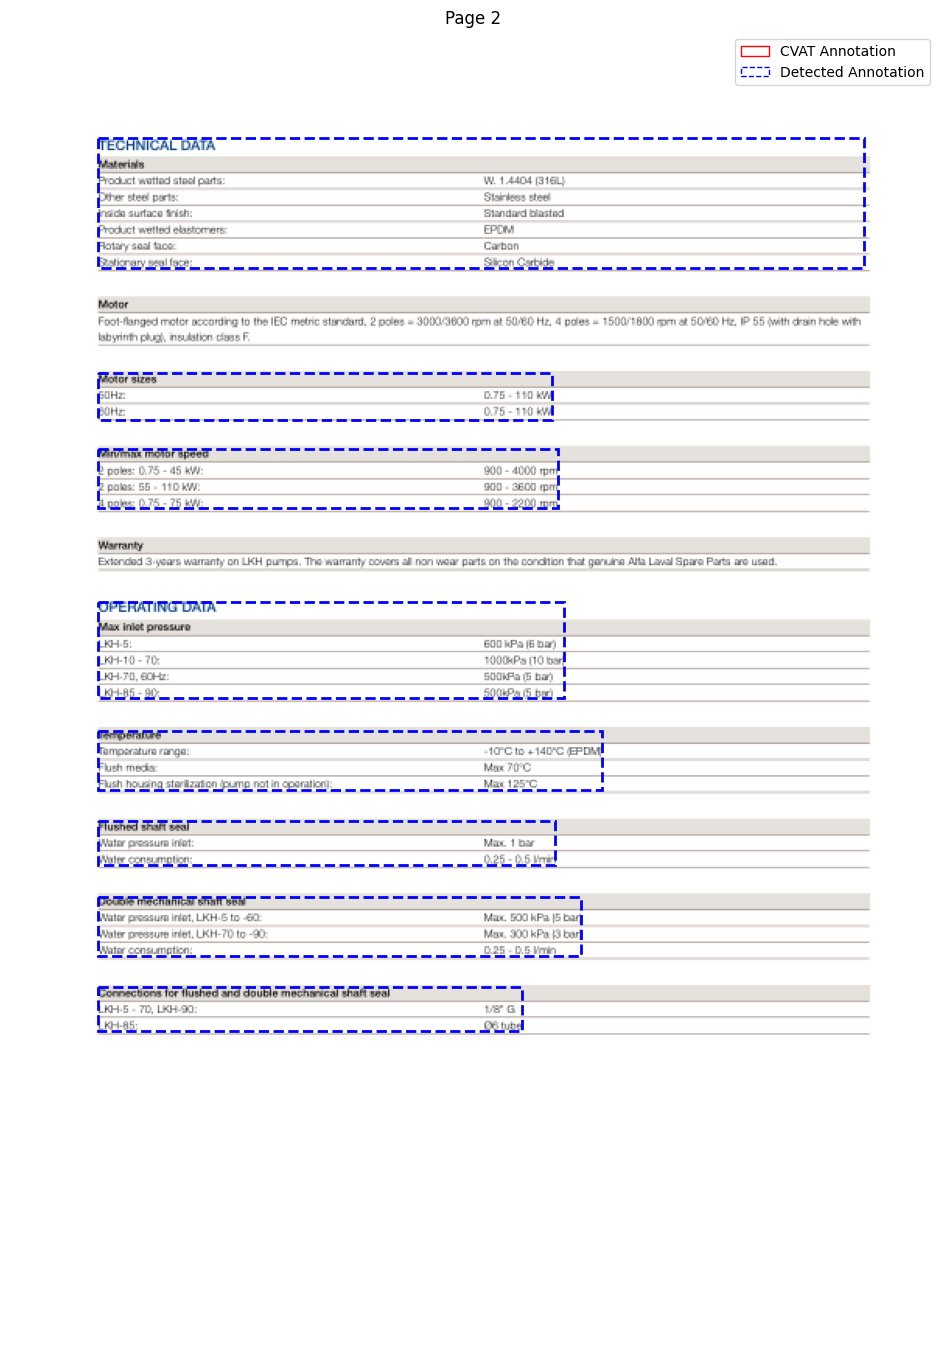

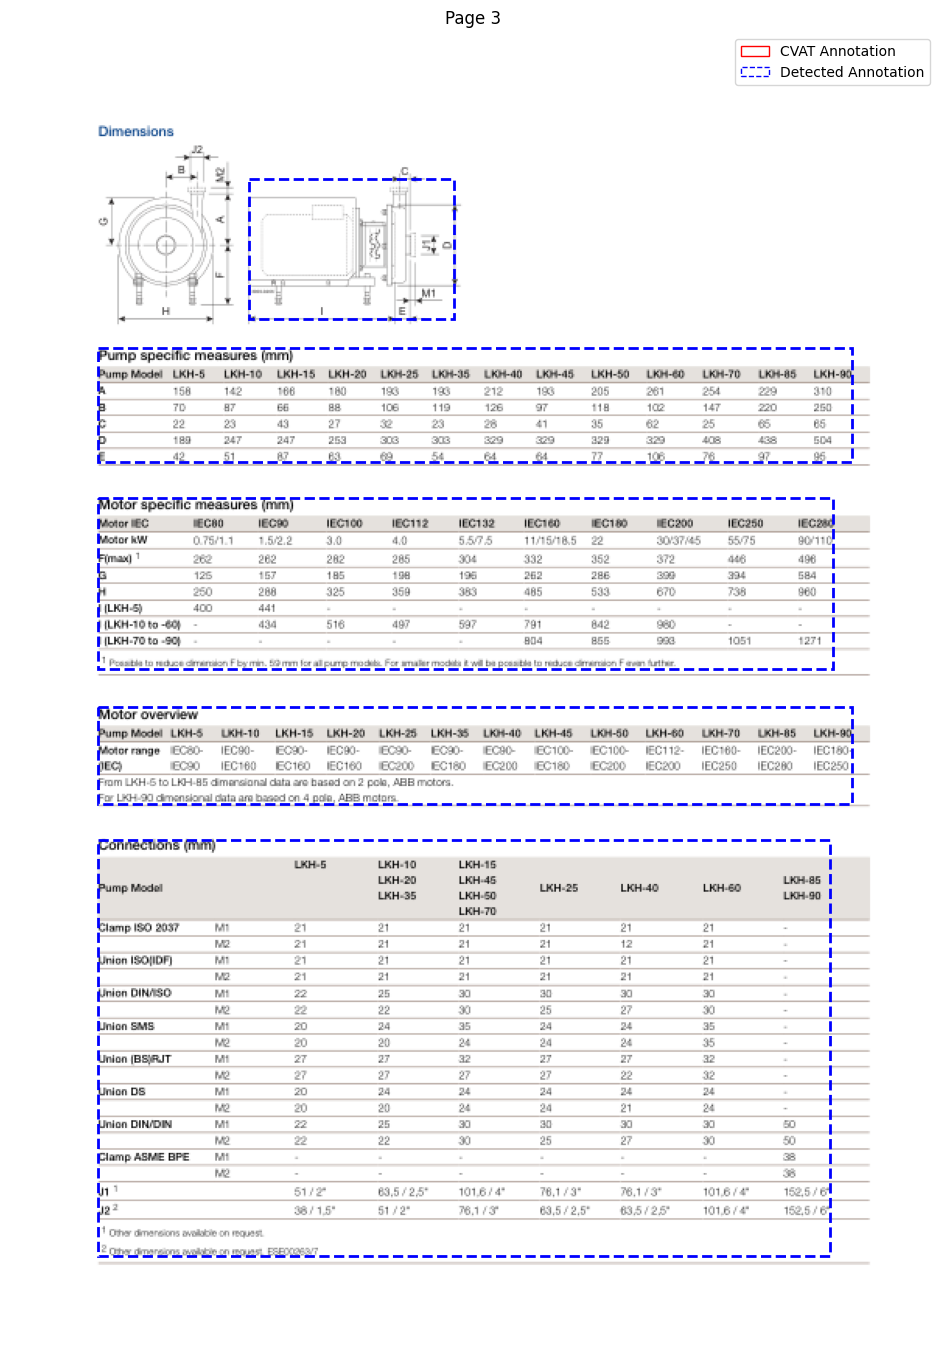

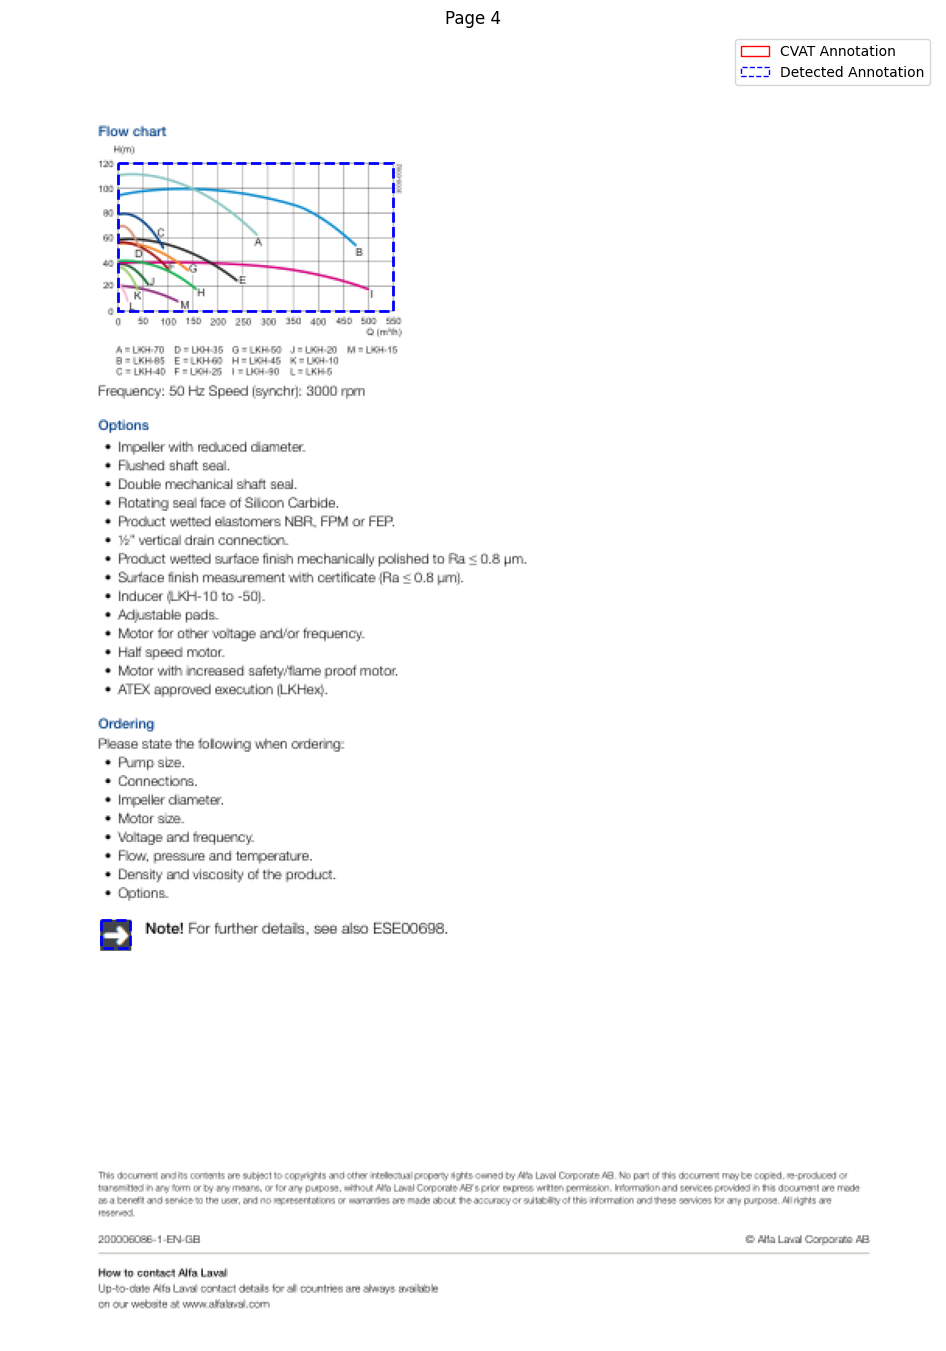

In [23]:
# Load the annotation data
annotation_path = f'{base_path}/demo/data/Alfa Laval LKH_anno_text.json' # GT annotation by human base on Plumber dectection
# annotation_path = f'{base_path}/demo/data/layout_annotation.json' # Detected bounding boxes by the LLM model
# annotation_path = f'{base_path}/demo/data/confidential_doc.json'

# the ground truth bounding boxes and the detected bounding boxes
layout_evaluator = LayoutEvaluator(pdf_path, annotation_path)
gt = layout_evaluator.ground_truth_bboxes

# Extract detected bounding boxes
detector = layout_evaluator.extract_detected_bboxes(doc_transformer)
output = f'{base_path}/demo/'
# pages = [1,2] # list the pages [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
visualize_bboxes_on_pdf(pdf_path, gt, detector, output)

In [8]:
# Compare bounding boxes and get results
overlap, comparison = layout_evaluator.compare_bounding_boxes()
overlap

[{'pdf_page_num': 2,
  'cvat_page_num': 2,
  'iou': 0.8524881938256985,
  'pdf_bbox': [54, 87, 361, 151],
  'cvat_bbox': [157.09, 222.89, 1013.75, 427.4]},
 {'pdf_page_num': 2,
  'cvat_page_num': 2,
  'iou': 0.8514777214316478,
  'pdf_bbox': [56, 219, 348, 247],
  'cvat_bbox': [153.95, 606.7, 988.4000000000001, 695.5300000000001]},
 {'pdf_page_num': 2,
  'cvat_page_num': 2,
  'iou': 0.7625921245243086,
  'pdf_bbox': [56, 366, 356, 428],
  'cvat_bbox': [152.6, 1049.5, 1007.24, 1196.2]},
 {'pdf_page_num': 2,
  'cvat_page_num': 2,
  'iou': 0.8378222782475752,
  'pdf_bbox': [56, 507, 350, 535],
  'cvat_bbox': [153.95, 1404.81, 995.1199999999999, 1494.98]},
 {'pdf_page_num': 2,
  'cvat_page_num': 2,
  'iou': 0.887900893316119,
  'pdf_bbox': [56, 556, 367, 594],
  'cvat_bbox': [153.95, 1538.05, 1031.46, 1655.1399999999999]},
 {'pdf_page_num': 2,
  'cvat_page_num': 2,
  'iou': 0.8539225192763701,
  'pdf_bbox': [56, 614, 329, 642],
  'cvat_bbox': [153.95, 1702.25, 931.8699999999999, 1791.08]},

In [9]:
def print_detailed_bboxes_info(comparison_results):
    for result in comparison_results:
        print(f"PDF Page: {result['pdf_page_num']}, CVAT Page: {result['cvat_page_num']}")
        print(f"PDF BBox: {result['pdf_bbox']}")
        print(f"CVAT BBox: {result['cvat_bbox']}")
        print(f"IOU: {result['iou']}\n")

print_detailed_bboxes_info(comparison)

PDF Page: 2, CVAT Page: 2
PDF BBox: [54, 87, 361, 151]
CVAT BBox: [157.09, 222.89, 1013.75, 427.4]
IOU: 0.8524881938256985

PDF Page: 2, CVAT Page: 2
PDF BBox: [55, 220, 355, 306]
CVAT BBox: [153.95, 741.29, 993.78, 858.38]
IOU: 0.4380317976637471

PDF Page: 2, CVAT Page: 2
PDF BBox: [55, 390, 386, 641]
CVAT BBox: [155.3, 1241.96, 1067.8, 1360.4]
IOU: 0.16851445842137427

PDF Page: 2, CVAT Page: 2
PDF BBox: [56, 219, 348, 247]
CVAT BBox: [153.95, 606.7, 988.4000000000001, 695.5300000000001]
IOU: 0.8514777214316478

PDF Page: 2, CVAT Page: 2
PDF BBox: [56, 366, 356, 428]
CVAT BBox: [152.6, 1049.5, 1007.24, 1196.2]
IOU: 0.7625921245243086

PDF Page: 2, CVAT Page: 2
PDF BBox: [56, 507, 350, 535]
CVAT BBox: [153.95, 1404.81, 995.1199999999999, 1494.98]
IOU: 0.8378222782475752

PDF Page: 2, CVAT Page: 2
PDF BBox: [56, 556, 367, 594]
CVAT BBox: [153.95, 1538.05, 1031.46, 1655.1399999999999]
IOU: 0.887900893316119

PDF Page: 2, CVAT Page: 2
PDF BBox: [56, 614, 329, 642]
CVAT BBox: [153.95, 17

In [10]:
# Calculate mean IOU
mean_iou = layout_evaluator.calculate_mean_iou(comparison)
print(f'Mean IOU: {mean_iou}')

# Calculate mAP
map_score = layout_evaluator.calculate_map(comparison)
print(f'mAP: {map_score}')

Mean IOU: 0.7606063525789241
mAP: 0.6416666666666667


In [11]:
import pandas as pd
comparison_df = pd.DataFrame(comparison)
# Show only for comparison_df where iou is not 0
comparison_df[comparison_df['iou'] != 0]

pdf_page_num  cvat_page_num       iou             pdf_bbox  \
0              2              2  0.852488   [54, 87, 361, 151]   
1              2              2  0.438032  [55, 220, 355, 306]   
2              2              2  0.168514  [55, 390, 386, 641]   
3              2              2  0.851478  [56, 219, 348, 247]   
4              2              2  0.762592  [56, 366, 356, 428]   
5              2              2  0.837822  [56, 507, 350, 535]   
6              2              2  0.887901  [56, 556, 367, 594]   
7              2              2  0.853923  [56, 614, 329, 642]   
8              3              3  0.900036  [56, 313, 529, 395]   
9              3              3  0.940302  [56, 532, 527, 763]   
10             3              3  0.927858  [56, 217, 540, 277]   
11             3              3  0.706330  [54, 448, 541, 486]   

                                            cvat_bbox  
0                    [157.09, 222.89, 1013.75, 427.4]  
1                    [153.95, 741.29, 993.78, 858.38]  
2                    [155.3, 1241.96, 1067.8, 1360.4]  
3   [153.95, 606.7, 988.4000000000001, 695.5300000...  
4                    [152.6, 1049.5, 1007.24, 1196.2]  
5       [153.95, 1404.81, 995.1199999999999, 1494.98]  
6      [153.95, 1538.05, 1031.46, 1655.1399999999999]  
7       [153.95, 1702.25, 931.8699999999999, 1791.08]  
8                   [153.68, 863.9, 1534.55, 1104.81]  
9                  [155.03, 1472.2, 1531.86, 2120.95]  
10       [153.68, 597.42, 1534.6000000000001, 772.38]  
11                [153.68, 1238.06, 1534.55, 1325.54]

In [12]:
# Filter the bounding boxes to include only pages 2 and 3
filtered_detected_bboxes = [bbox for bbox in detector if bbox[0] in [2, 3]]
filtered_ground_truth_bboxes = [bbox for bbox in gt if bbox[0] in [2, 3]]
filtered_ground_truth_bboxes = [bbox for bbox in layout_evaluator.ground_truth_bboxes if bbox[0] in [2, 3]]

# Calculate precision and recall at IOU threshold of 0.5
precision, recall = layout_evaluator.calculate_precision_recall(comparison, 0.5)
print(f"Precision: {precision}, Recall: {recall}")


Precision: 0.8333333333333334, Recall: 0.7142857142857143


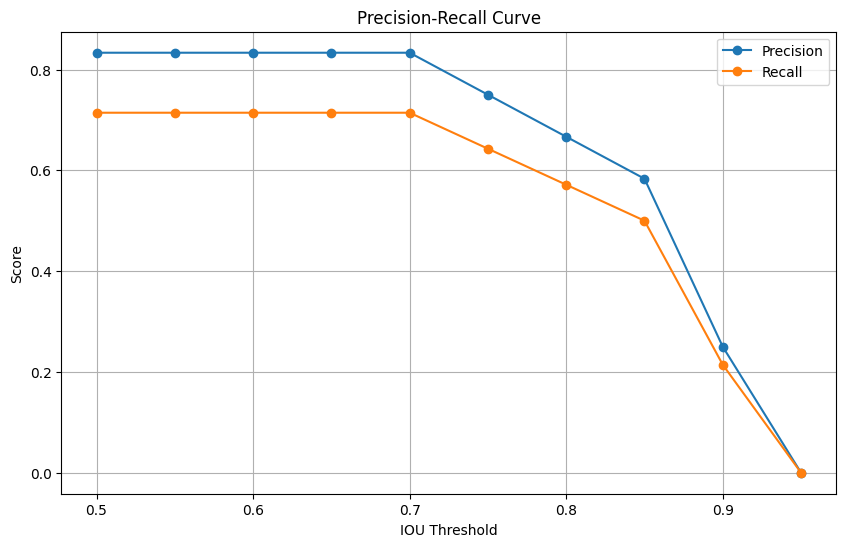

In [13]:

plot_precision_recall_curve(comparison, filtered_ground_truth_bboxes)


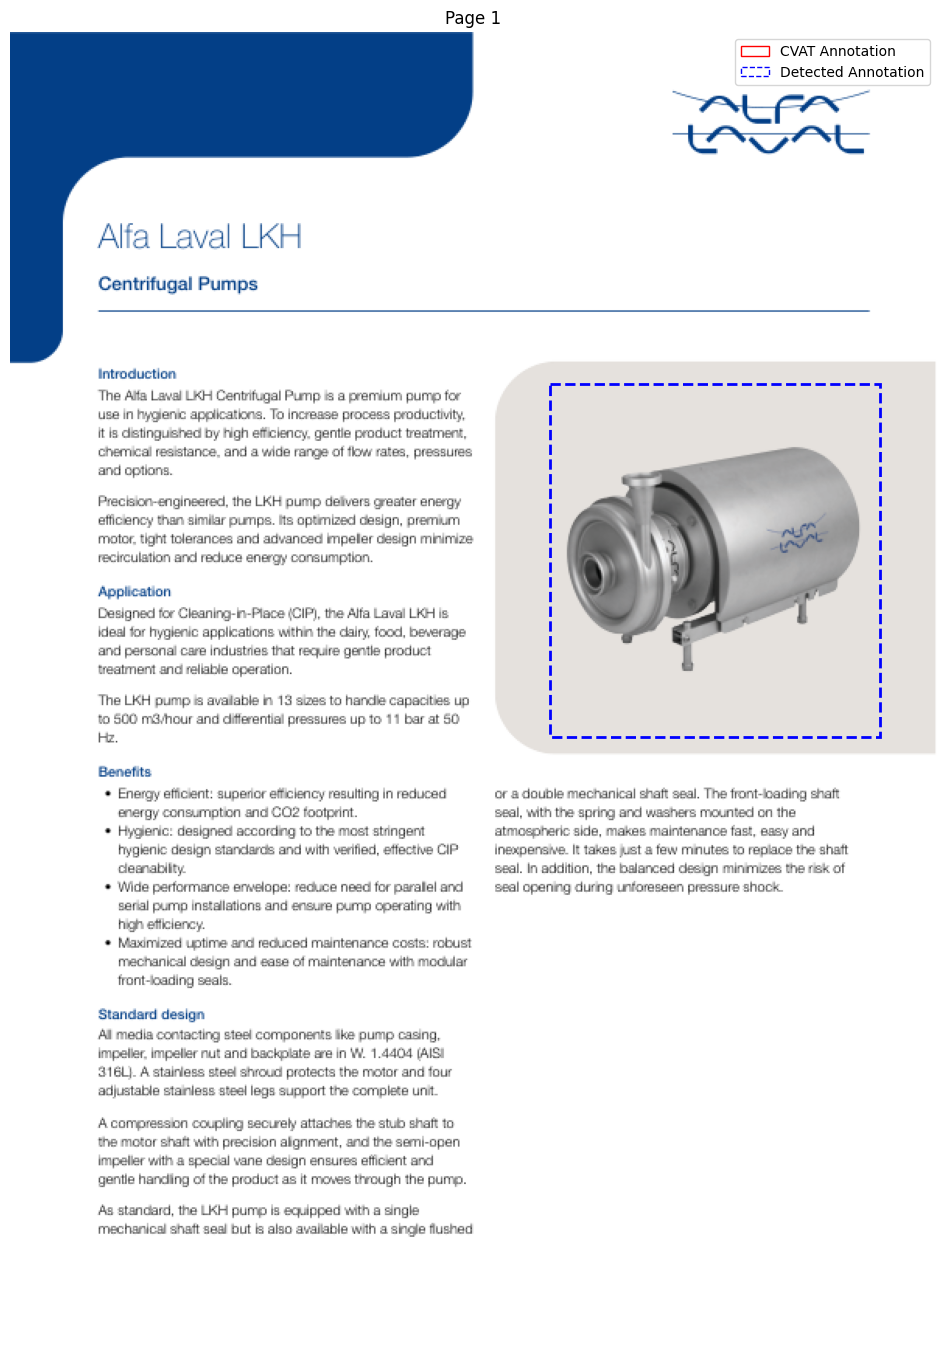

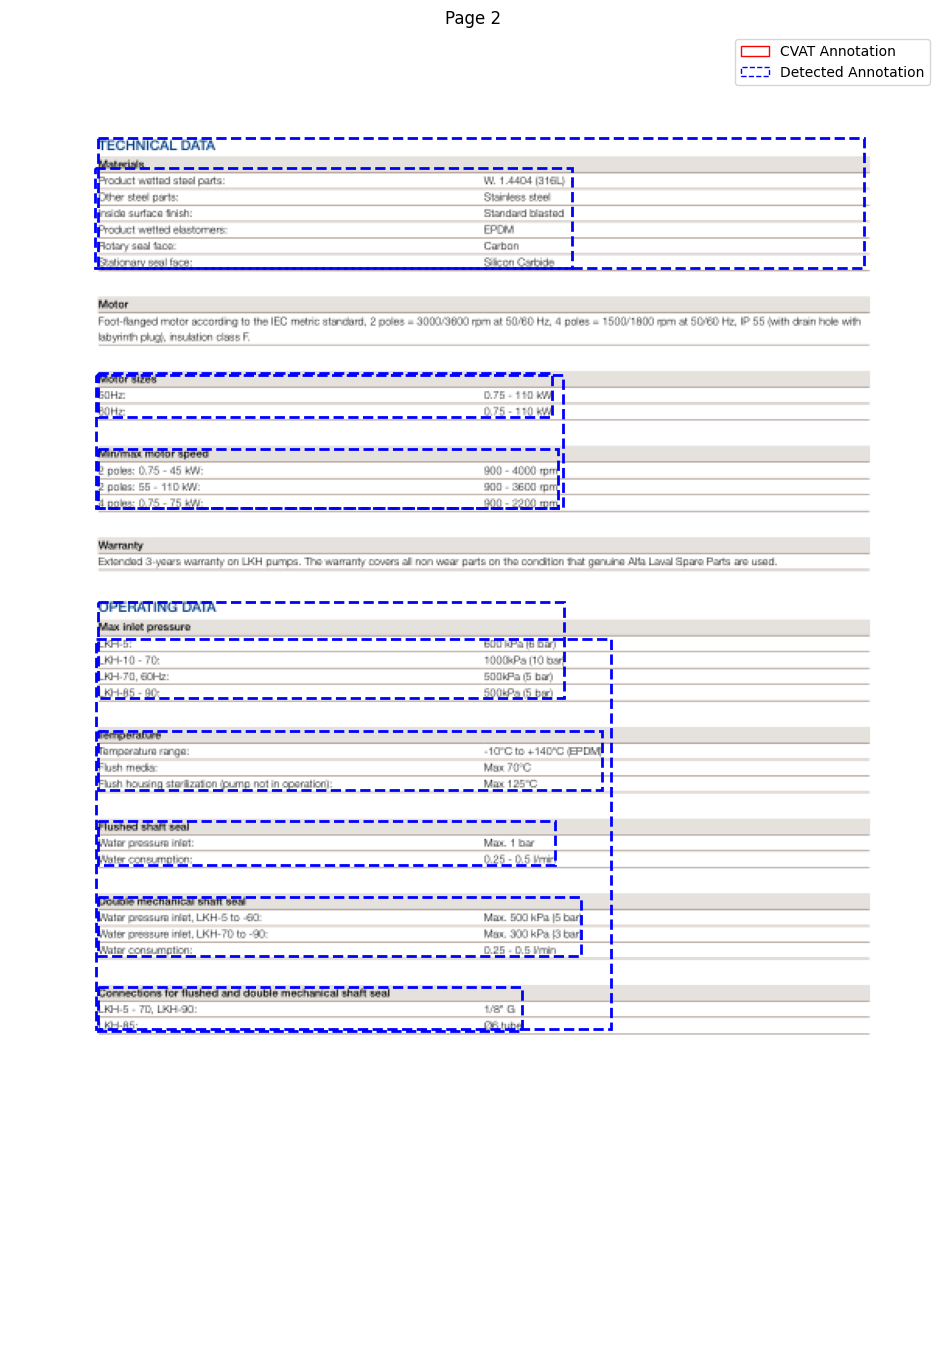

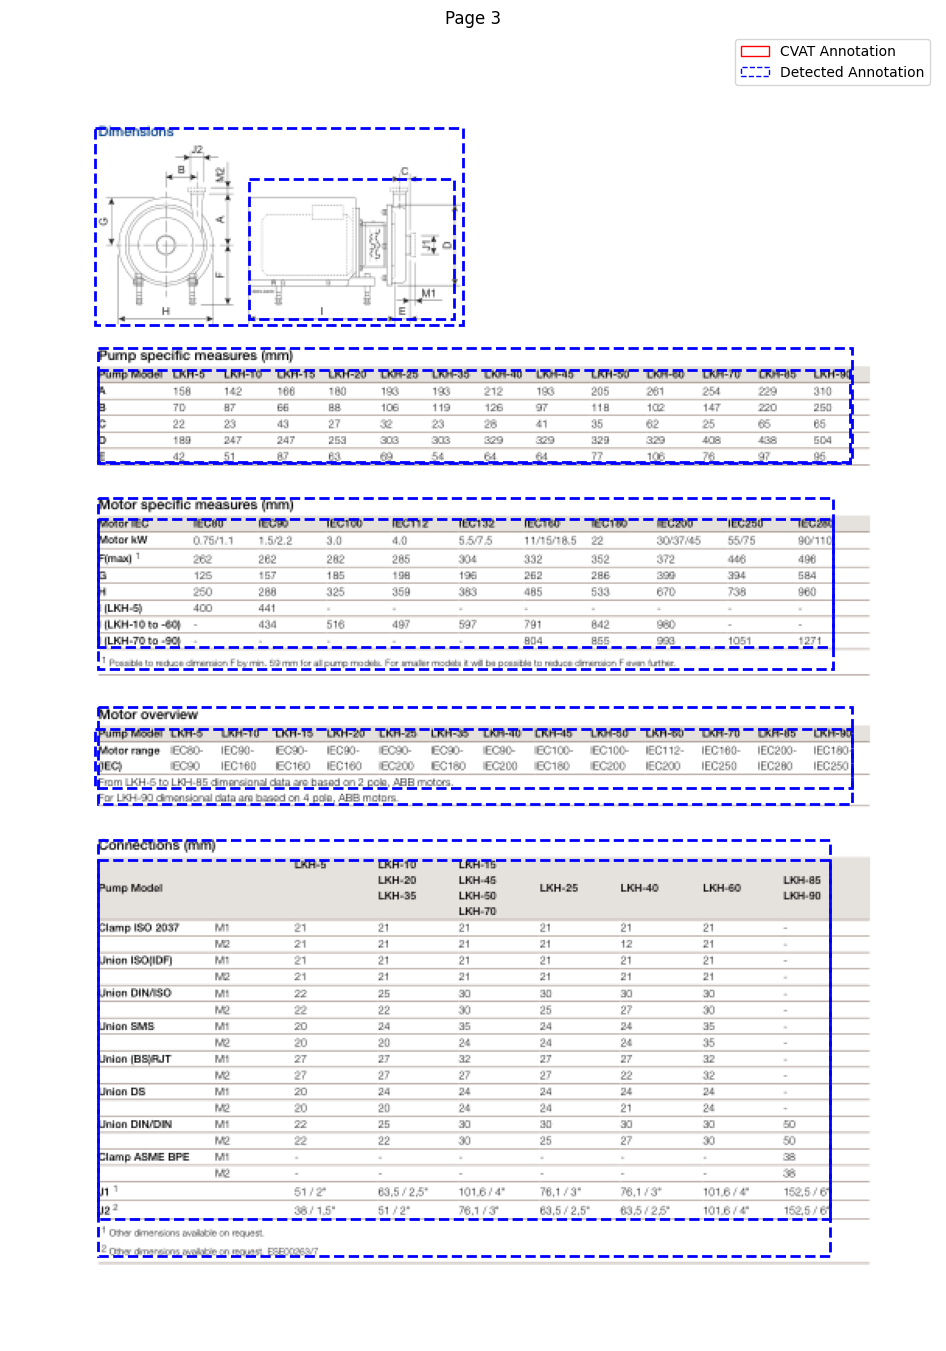

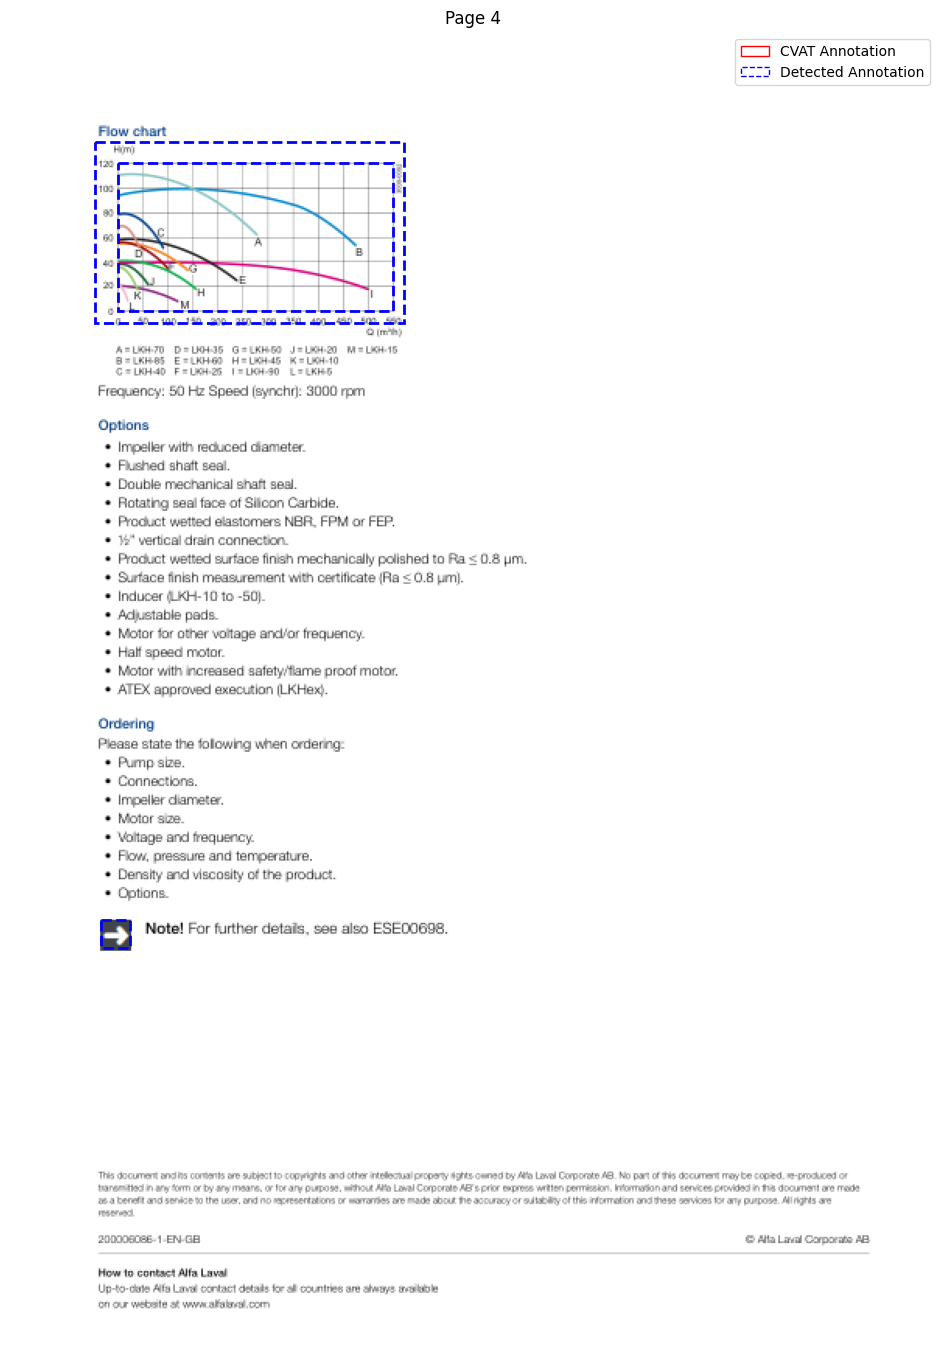

In [14]:
def visualize_bboxes_on_pdf(pdf_path: str, ground_truth_bboxes: List[Tuple[int, List[float]]], detected_bboxes: List[Tuple[int, List[float]]], output_path: str, pages_to_visualize: List[int] = None):
    doc = fitz.open(pdf_path)
    
    if pages_to_visualize is None or len(pages_to_visualize) == 0:
        pages_to_visualize = list(range(1, len(doc) + 1))
    
    for page_number in pages_to_visualize:
        page = doc.load_page(page_number - 1)  # Page number correction
        new_scale = page.rect.width, page.rect.height  # Get the width and height of the fitz page

        # Prepare to display
        pix = page.get_pixmap()
        img = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)
        plt.figure(figsize=(15, 17))
        plt.imshow(img)
        ax = plt.gca()
        
        # Draw CVAT bounding boxes
        # print(ground_truth_bboxes)
        # for bbox in ground_truth_bboxes:
        #     if bbox[0] == page_number:
        #         old_scale = bbox[2]  # Get the dimensions of the CVAT image
        #         x1, y1, x2, y2 = rescale_bbox(bbox[1], old_scale, new_scale)
        #         rect = Rectangle((x1, y1), x2-x1, y2-y1, linewidth=2, edgecolor='r', facecolor='none', label='CVAT Annotation')
        #         ax.add_patch(rect)
        
        # Draw detected bounding boxes
        # print(detected_bboxes)
        for bbox in detected_bboxes:
            if bbox[0] == page_number:
                x1, y1, x2, y2 = bbox[1]
                rect = Rectangle((x1, y1), x2-x1, y2-y1, linewidth=2, edgecolor='b', facecolor='none', linestyle='dashed', label='Detected Annotation')
                ax.add_patch(rect)
        
        plt.title(f"Page {page_number}")
        plt.axis('off')
        plt.legend(handles=[Rectangle((0, 0), 1, 1, edgecolor='r', facecolor='none', label='CVAT Annotation'),
                            Rectangle((0, 0), 1, 1, edgecolor='b', facecolor='none', linestyle='dashed', label='Detected Annotation')])
        plt.show()
        
        
visualize_bboxes_on_pdf(pdf_path, gt, detector, output)

In [15]:
detector

[(1, [347, 226, 559, 453]),
 (2, [54, 87, 361, 151]),
 (2, [55, 220, 355, 306]),
 (2, [55, 390, 386, 641]),
 (2, [56, 68, 549, 151]),
 (2, [56, 219, 348, 247]),
 (2, [56, 268, 352, 306]),
 (2, [56, 366, 356, 428]),
 (2, [56, 449, 380, 487]),
 (2, [56, 507, 350, 535]),
 (2, [56, 556, 367, 594]),
 (2, [56, 614, 329, 642]),
 (3, [54, 61, 291, 188]),
 (3, [56, 313, 529, 395]),
 (3, [56, 532, 527, 763]),
 (3, [56, 217, 540, 277]),
 (3, [54, 448, 541, 486]),
 (3, [153, 94, 285, 184]),
 (3, [56, 203, 541, 276]),
 (3, [56, 299, 529, 409]),
 (3, [56, 434, 541, 496]),
 (3, [56, 519, 527, 787]),
 (4, [58, 571, 77, 589]),
 (4, [54, 70, 253, 187]),
 (4, [69, 84, 246, 179])]

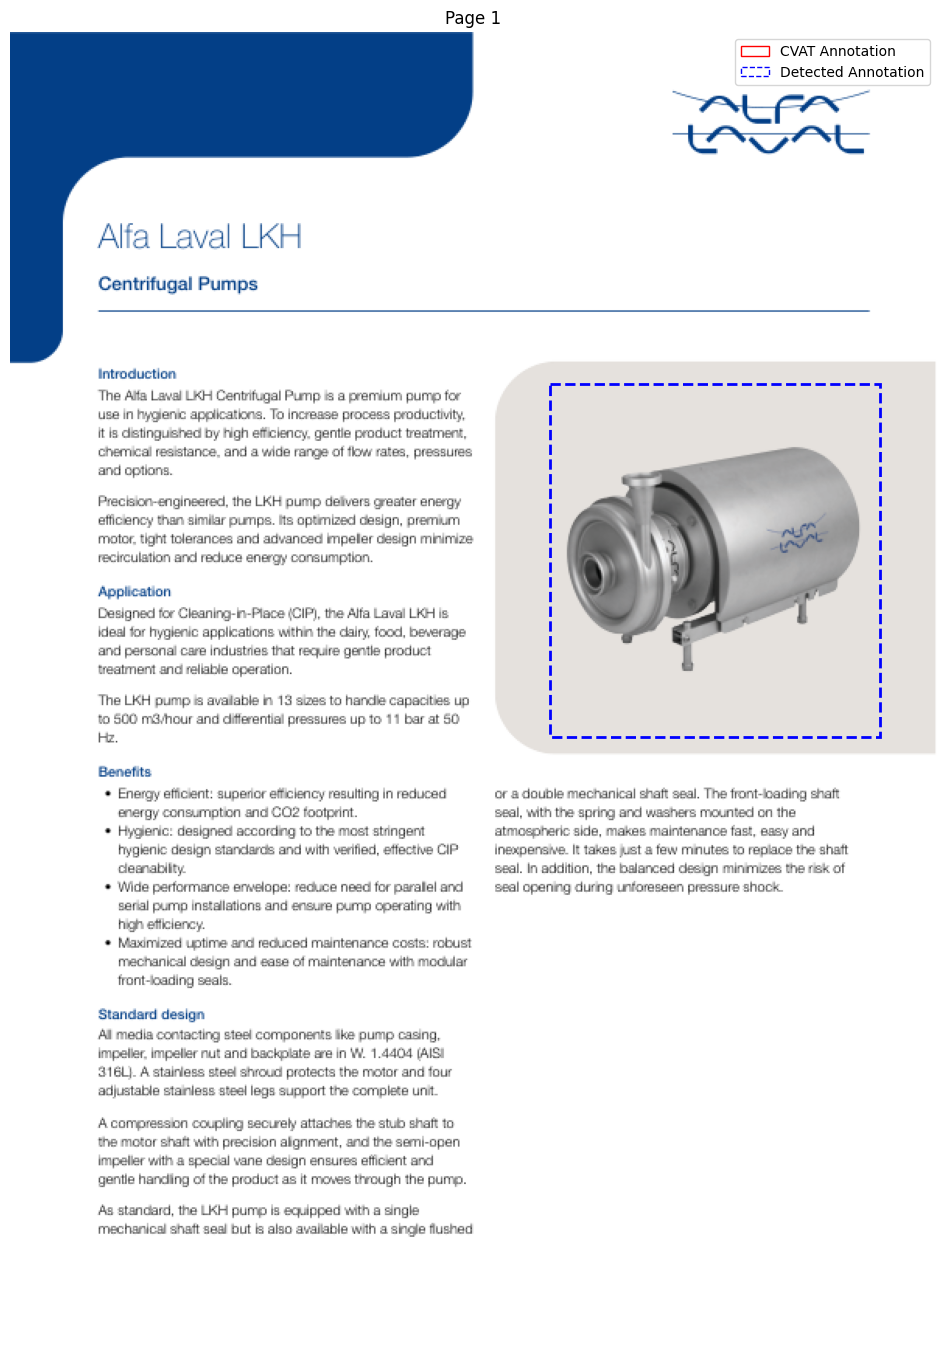

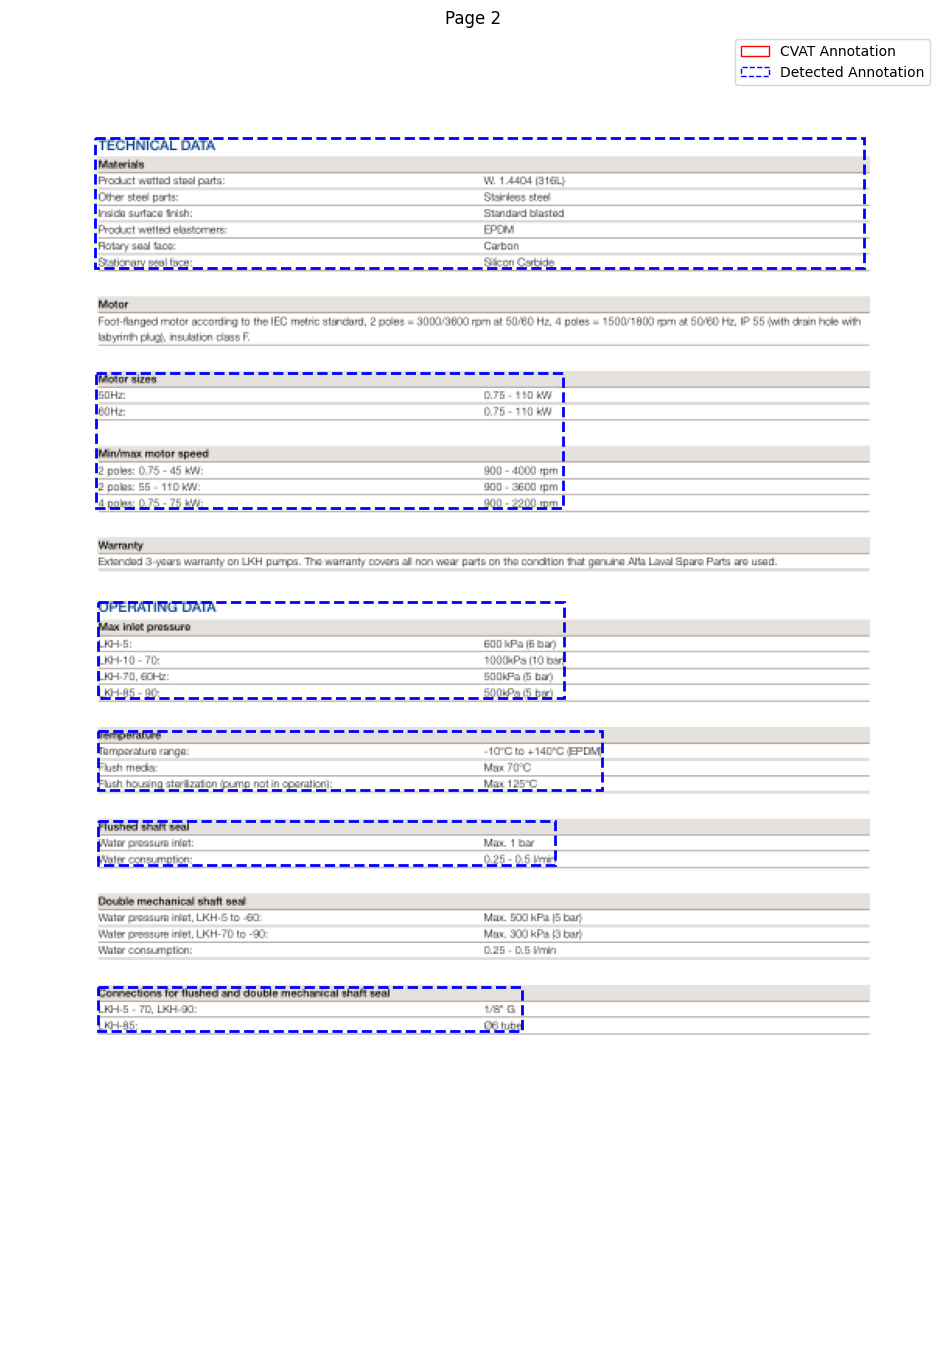

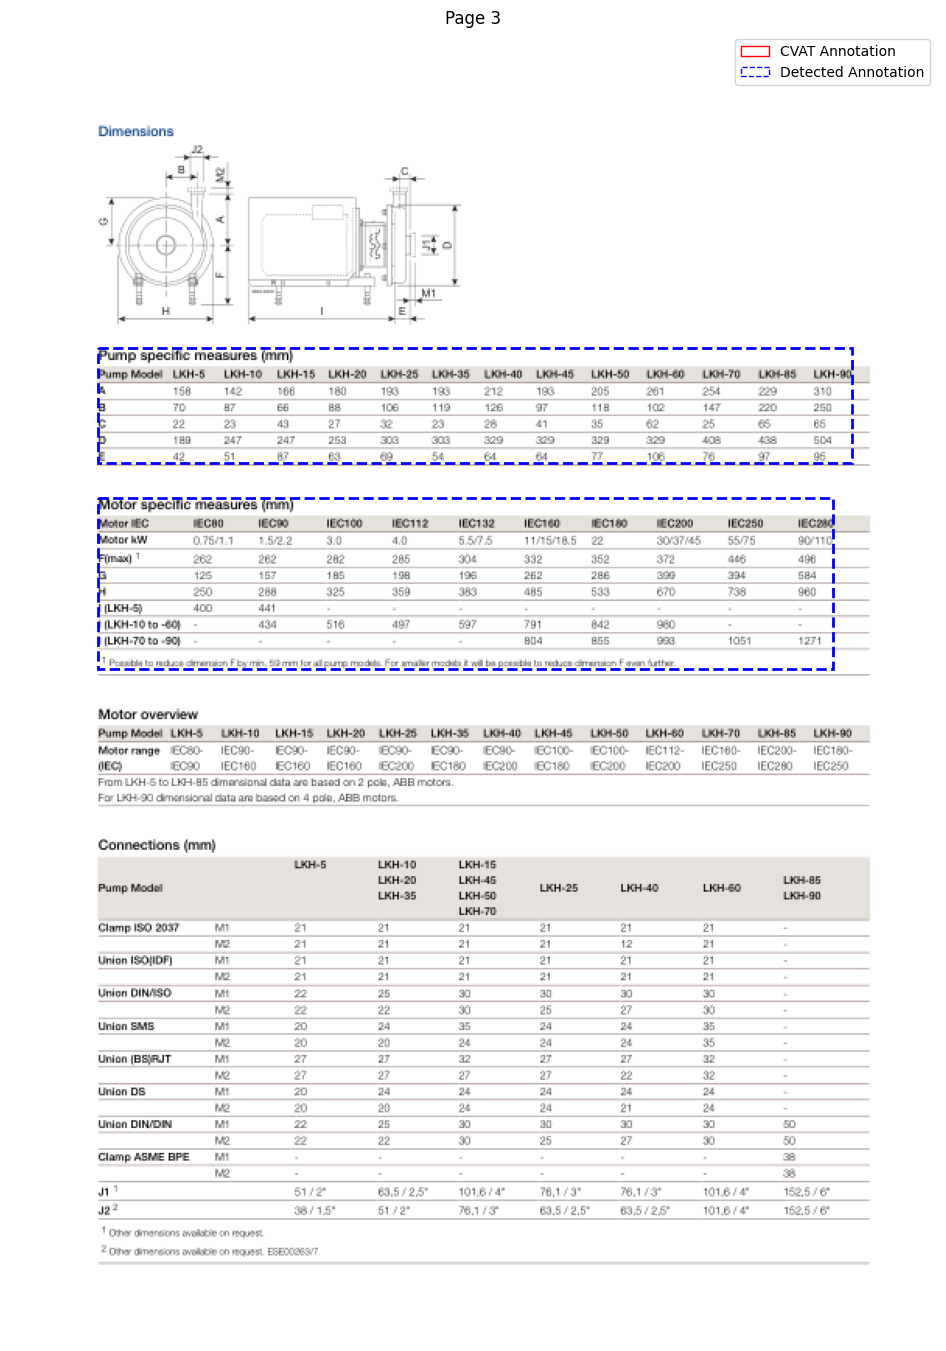

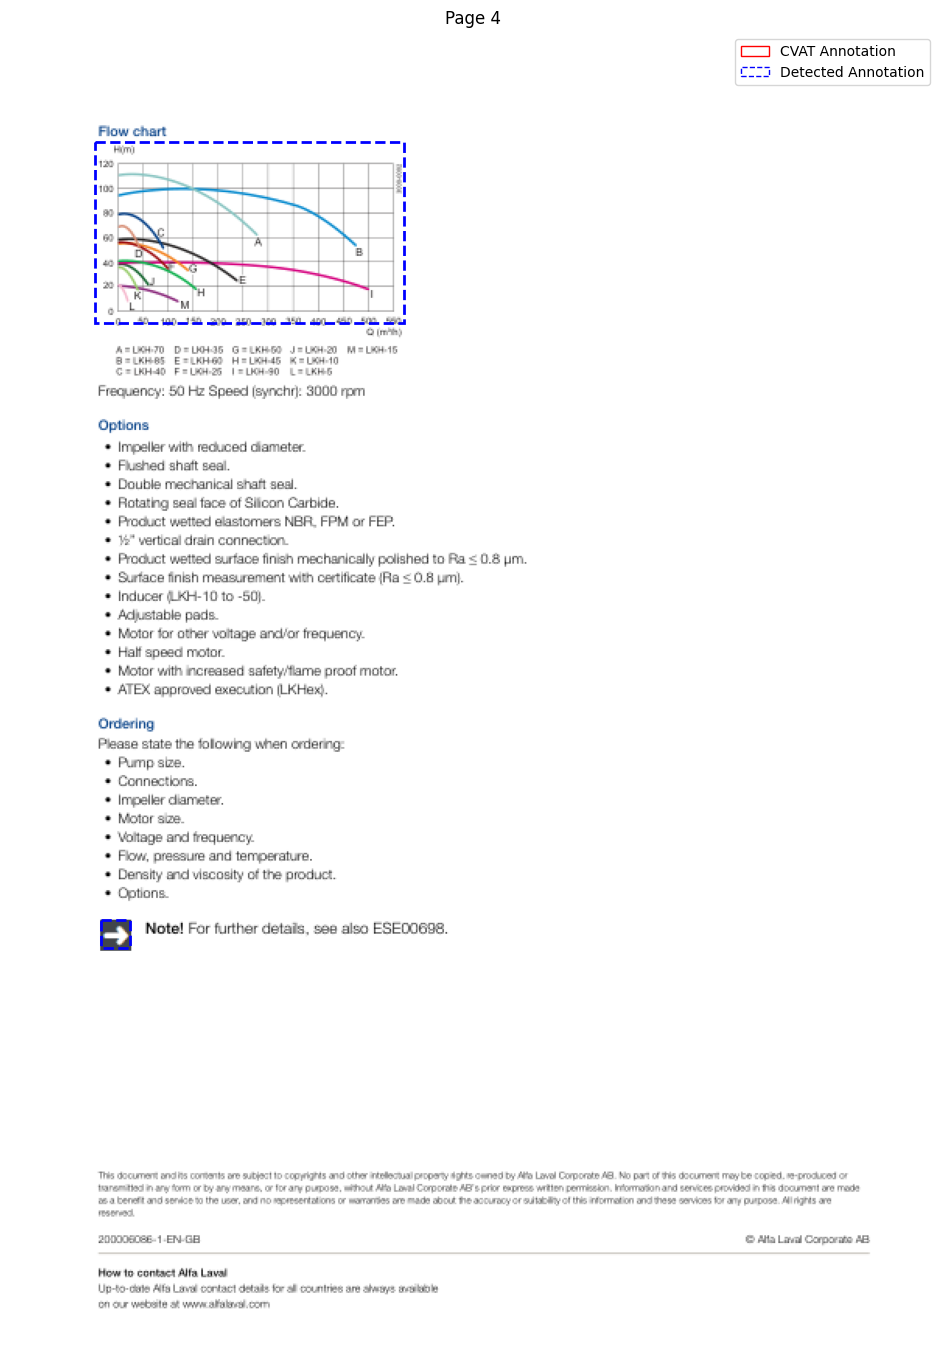

In [16]:
def compute_iou(box1, box2):
    x1, y1, x2, y2 = box1
    x1_p, y1_p, x2_p, y2_p = box2
    xi1, yi1, xi2, yi2 = max(x1, x1_p), max(y1, y1_p), min(x2, x2_p), min(y2, y2_p)
    inter_area = max(0, xi2 - xi1) * max(0, yi2 - yi1)
    box1_area = (x2 - x1) * (y2 - y1)
    box2_area = (x2_p - x1_p) * (y2_p - y1_p)
    union_area = box1_area + box2_area - inter_area
    return inter_area / union_area

def merge_bounding_boxes(bboxes: List[Tuple[int, List[float]]], threshold=0.8) -> List[Tuple[int, List[float]]]:
    merged_bboxes = []
    used = [False] * len(bboxes)

    for i in range(len(bboxes)):
        if used[i]:
            continue
        box1 = bboxes[i][1]
        merge_box = box1.copy()
        for j in range(i + 1, len(bboxes)):
            if used[j]:
                continue
            box2 = bboxes[j][1]
            if bboxes[i][0] == bboxes[j][0] and compute_iou(box1, box2) > threshold:
            #if compute_iou(box1, box2) > threshold:
                merge_box = [
                    min(merge_box[0], box2[0]),
                    min(merge_box[1], box2[1]),
                    max(merge_box[2], box2[2]),
                    max(merge_box[3], box2[3])
                ]
                used[j] = True
        merged_bboxes.append((bboxes[i][0], merge_box))
        used[i] = True
    # return merged_bboxes
    # Remove larger bounding boxes that fully enclose other bounding boxes and overlap with them
    final_bboxes = []
    for i in range(len(merged_bboxes)):
        keep = True
        for j in range(len(merged_bboxes)):
            if i != j:
                box1 = merged_bboxes[i][1]
                box2 = merged_bboxes[j][1]
                if (box2[0] >= box1[0] and box2[1] >= box1[1] and
                    box2[2] <= box1[2] and box2[3] <= box1[3] and
                    compute_iou(box1, box2) > 0):
                    keep = False
                    break
        if keep:
            final_bboxes.append(merged_bboxes[i])
    
    return final_bboxes

merged_bboxes = merge_bounding_boxes(detector, 0.2)
    
visualize_bboxes_on_pdf(pdf_path, gt, merged_bboxes, output)